<a href="https://colab.research.google.com/github/nishultomar/TensorflowExercises/blob/master/Tensorflow_Excercise9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classification**

In [0]:
import pandas as pd

In [78]:
df = pd.read_csv('/content/drive/My Drive/ML Exercise/Diabetes.csv')
df.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [79]:
df.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [0]:
#normalise dataframe by removing independent variable
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [0]:
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()) )

In [82]:
df.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [0]:
import tensorflow as tf

In [84]:
df.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [0]:
#save columns(numeric) to variables through feature columns
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_glucose = tf.feature_column.numeric_column('Glucose_concentration')
blood_pres = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
pedigree = tf.feature_column.numeric_column('Pedigree')
age_bucket = tf.feature_column.numeric_column('Age')

In [0]:
#handle categorical data for known data categories
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

**OR**

In [0]:
#handle categorical data for huge and unknown data categories
#assigned_grop = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

In [0]:
import matplotlib.pyplot as plt

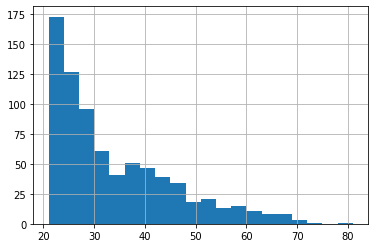

In [89]:
df['Age'].hist(bins=20)

In [0]:
age_bucket = tf.feature_column.bucketized_column(age_bucket,boundaries = [20,30,40,50,60,70,80])

In [0]:
feat_cols = [num_preg ,plasma_glucose,blood_pres ,tricep ,insulin,bmi,pedigree ,assigned_group, age_bucket]

In [92]:
x_data  = df.drop('Class',axis=1)
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [93]:
labels = df['Class']
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

**Splitting data using Sklearn**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test= train_test_split(x_data,labels,test_size=0.3, random_state=101)

In [96]:
x_train

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
711,0.294118,0.633166,0.639344,0.272727,0.026005,0.441133,0.154142,40,D
58,0.000000,0.733668,0.672131,0.000000,0.000000,0.603577,0.727156,44,D
216,0.294118,0.547739,0.508197,0.414141,0.152482,0.533532,0.186166,25,B
168,0.235294,0.552764,0.540984,0.000000,0.000000,0.475410,0.167805,29,B
658,0.647059,0.638191,0.868852,0.000000,0.000000,0.581222,0.047822,51,A
...,...,...,...,...,...,...,...,...,...
75,0.058824,0.000000,0.393443,0.202020,0.000000,0.368107,0.026473,22,D
599,0.058824,0.547739,0.311475,0.181818,0.141844,0.344262,0.140478,26,A
575,0.058824,0.597990,0.360656,0.474747,0.074468,0.529061,0.086251,25,A
337,0.294118,0.577889,0.622951,0.000000,0.000000,0.464978,0.113151,44,A


In [97]:
x_test

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,47,C
748,0.176471,0.939698,0.573770,0.222222,0.236407,0.542474,0.140905,36,B
42,0.411765,0.532663,0.754098,0.181818,0.000000,0.338301,0.067037,48,A
485,0.000000,0.678392,0.557377,0.424242,0.295508,0.630402,0.122545,24,C
543,0.235294,0.422111,0.737705,0.232323,0.066194,0.588674,0.034586,25,C
...,...,...,...,...,...,...,...,...,...
188,0.470588,0.547739,0.622951,0.393939,0.134752,0.415797,0.239966,31,C
8,0.117647,0.989950,0.573770,0.454545,0.641844,0.454545,0.034159,53,D
645,0.117647,0.788945,0.606557,0.353535,0.520095,0.587183,0.023911,30,C
381,0.000000,0.527638,0.557377,0.222222,0.000000,0.298063,0.067464,22,A


In [0]:
input_func = tf.estimator.inputs.pandas_input_fn(x=x_train,y=y_train, batch_size=10,num_epochs=1000,shuffle=True)

In [99]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpy6wov6m7', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fea33af49b0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [100]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpy6wov6m7/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 291.304
INFO:tensorflow:loss = 5.365877, step = 101 (0.346 sec)
INFO:tensorflow:global_step/sec: 410.619
INFO:tensorflow:loss = 4.5000973, step = 201 (0.247 sec)
INFO:tensorflow:global_step/sec: 363.833
INFO:tensorflow:loss = 7.3128543, step = 301 (0.277 sec)
INFO:tensorflow:global_step/sec: 379.763
INFO:tensorflow:loss = 5.169715, step = 401 (0.257 sec)
INFO:tensorflow:global_step/sec: 369.86
INFO:tensorflow:loss = 5.5127726, step = 501 (0.274 sec)
INFO:tensorflow:global_step/sec: 376.988
INFO:tensorflow:loss = 5.0497494, step = 601 (0.264 sec)
INFO:tensorflow:global_step/sec: 364.662
INFO:tensorflow:loss

In [0]:
#To evaluate the model
eval_input_func= tf.estimator.inputs.pandas_input_fn(x=x_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [102]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-02-14T06:56:29Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpy6wov6m7/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-02-14-06:56:30
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74458873, accuracy_baseline = 0.64935064, auc = 0.801605, auc_precision_recall = 0.6439115, average_loss = 0.5248388, global_step = 1000, label/mean = 0.35064936, loss = 5.0515733, precision = 0.67741936, prediction/mean = 0.34870252, recall = 0.5185185
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpy6wov6m7/model.ckpt-1000


In [103]:
results

{'accuracy': 0.74458873,
 'accuracy_baseline': 0.64935064,
 'auc': 0.801605,
 'auc_precision_recall': 0.6439115,
 'average_loss': 0.5248388,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.0515733,
 'precision': 0.67741936,
 'prediction/mean': 0.34870252,
 'recall': 0.5185185}

In [0]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test, batch_size=10, num_epochs=1, shuffle=False)

In [0]:
predictions = model.predict(pred_input_func)

In [106]:
predictions

<generator object Estimator.predict at 0x7fea3a1abf10>

In [107]:
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpy6wov6m7/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [108]:
my_pred

[{'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.5016184], dtype=float32),
  'logits': array([0.00647366], dtype=float32),
  'probabilities': array([0.49838164, 0.50161844], dtype=float32)},
 {'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.61271644], dtype=float32),
  'logits': array([0.45874512], dtype=float32),
  'probabilities': array([0.38728356, 0.61271644], dtype=float32)},
 {'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.33855486], dtype=float32),
  'logits': array([-0.66974103], dtype=float32),
  'probabilities': array([0.6614452 , 0.33855486], dtype=float32)}

In [109]:
#Perform Dense Neural Network Classifer
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp2xrc1r5s', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fea3bfeb358>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [110]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.


ValueError: ignored

In [0]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group,dimension=4)

In [0]:
feat_cols = [num_preg ,plasma_glucose,blood_pres ,tricep ,insulin,bmi,pedigree ,embedded_group_col, age_bucket]

In [0]:
input_func = tf.estimator.inputs.pandas_input_fn(x_train,y_train,batch_size=1000,num_epochs=1,shuffle=False)

In [114]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpjs5_kc9u', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fea3bfc1630>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [115]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpjs5_kc9u/model.ckpt.
INFO:tensorflow:loss = 363.6354, step = 1
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpjs5_kc9u/model.ckpt.
INFO:tensorflow:Loss for final step: 363.6354.


In [0]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test,y=y_test,batch_size=1000,num_epochs=1,shuffle=False )

In [117]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-02-14T06:56:44Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpjs5_kc9u/model.ckpt-1
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-02-14-06:56:45
INFO:tensorflow:Saving dict for global step 1: accuracy = 0.64935064, accuracy_baseline = 0.64935064, auc = 0.56662554, auc_precision_recall = 0.38772884, average_loss = 0.645282, global_step = 1, label/mean = 0.35064936, loss = 149.06013, precision = 0.0, prediction/mean = 0.37897998, recall = 0.0
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1: /tmp/tmpjs5_kc9u/model.ckpt-1


{'accuracy': 0.64935064,
 'accuracy_baseline': 0.64935064,
 'auc': 0.56662554,
 'auc_precision_recall': 0.38772884,
 'average_loss': 0.645282,
 'global_step': 1,
 'label/mean': 0.35064936,
 'loss': 149.06013,
 'precision': 0.0,
 'prediction/mean': 0.37897998,
 'recall': 0.0}